In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 10
L2_REGULARIZATION = 0.001

# Define paths
data_dir = "C:\\mydata\\Python\\UCMerced_LandUse\\UCMerced_LandUse\\Images"
class_names = sorted(os.listdir(data_dir))
num_classes = len(class_names)

# Load and preprocess the dataset
data = []
labels = []

for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        data.append(img_array)
        labels.append(i)

data = np.array(data)
labels = np.array(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build the CNN model with L2 regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), kernel_regularizer=l2(L2_REGULARIZATION)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE), epochs=EPOCHS, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
53/53 [==============================] - 12s 178ms/step - loss: 12.3722 - accuracy: 0.0530 - val_loss: 3.7608 - val_accuracy: 0.1119
Epoch 2/10
53/53 [==============================] - 9s 166ms/step - loss: 3.8132 - accuracy: 0.0714 - val_loss: 3.7907 - val_accuracy: 0.0929
Epoch 3/10
53/53 [==============================] - 11s 205ms/step - loss: 3.7876 - accuracy: 0.0756 - val_loss: 3.8055 - val_accuracy: 0.0929
Epoch 4/10
53/53 [==============================] - 10s 188ms/step - loss: 3.7378 - accuracy: 0.0833 - val_loss: 3.7708 - val_accuracy: 0.0952
Epoch 5/10
53/53 [==============================] - 9s 176ms/step - loss: 3.7115 - accuracy: 0.0905 - val_loss: 3.7311 - val_accuracy: 0.0667
Epoch 6/10
53/53 [==============================] - 9s 169ms/step - loss: 3.7102 - accuracy: 0.0774 - val_loss: 3.7307 - val_accuracy: 0.0786
Epoch 7/10
53/53 [==============================] - 11s 208ms/step - loss: 3.6646 - accuracy: 0.0863 - val_loss: 3.6651 - val_accuracy: 0.0714
E

Epoch 1/10
53/53 [==============================] - 7s 131ms/step - loss: 3.5567 - accuracy: 0.0994 - val_loss: 3.5163 - val_accuracy: 0.0905
Epoch 2/10
53/53 [==============================] - 7s 133ms/step - loss: 3.4998 - accuracy: 0.1048 - val_loss: 3.4444 - val_accuracy: 0.1310
Epoch 3/10
53/53 [==============================] - 7s 132ms/step - loss: 3.4645 - accuracy: 0.1310 - val_loss: 3.5094 - val_accuracy: 0.1405
Epoch 4/10
53/53 [==============================] - 6s 115ms/step - loss: 3.4432 - accuracy: 0.1369 - val_loss: 3.3305 - val_accuracy: 0.1738
Epoch 5/10
53/53 [==============================] - 7s 136ms/step - loss: 3.4337 - accuracy: 0.1369 - val_loss: 3.3409 - val_accuracy: 0.1762
Epoch 6/10
53/53 [==============================] - 8s 144ms/step - loss: 3.4760 - accuracy: 0.1077 - val_loss: 3.3861 - val_accuracy: 0.1548
Epoch 7/10
53/53 [==============================] - 8s 144ms/step - loss: 3.3839 - accuracy: 0.1417 - val_loss: 3.2678 - val_accuracy: 0.1619
Epoch 

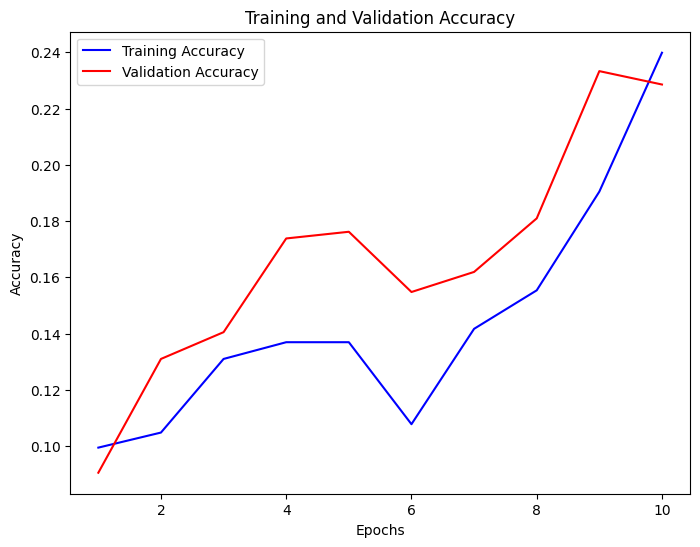

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Assuming you have already trained your model
history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE), 
                    epochs=EPOCHS, 
                    validation_data=(x_test, y_test))

# Get training and validation accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create an array of epochs
epochs = np.arange(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save("plant_classifier.h5")
